Fonte dos dados: https://pt.wikipedia.org/wiki/Lista_de_mortes_de_personalidades_do_rock

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Marcos\Análises\Clube dos 27\2022\lista_musicos.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     323 non-null    object
 1   Nome     323 non-null    object
 2   Idade    323 non-null    int64 
 3   Origem   323 non-null    object
 4   Atuação  323 non-null    object
 5   Causa    323 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.3+ KB


### Limpeza dos dados

 01 deixar apenas o ano na coluna Data 

In [2]:
# nisso aqui, vale a pena olhar o método split, onde o 4 diz quantas vezes vou dividir
col = df['Data'].str.split(' ', 4, expand=True)

#Criando uma nova coluna, chamada ano, pegando o índice da coluna onde está a info do ano:
df['Ano'] = col[4]
#Convertendo o tipo de dado de Ano, de object para int64
df['Ano'] = df['Ano'].astype('int64')

# Falta Retirar o caracter []  e os números da coluna Causa

df['Causa'] = df['Causa'].str.replace(']', '')
df['Causa'] = df['Causa'].str.replace('[', '')
df['Causa'] = df['Causa'].str.replace('0', '')
df['Causa'] = df['Causa'].str.replace('1', '')
df['Causa'] = df['Causa'].str.replace('2', '')
df['Causa'] = df['Causa'].str.replace('3', '')
df['Causa'] = df['Causa'].str.replace('4', '')
df['Causa'] = df['Causa'].str.replace('5', '')
df['Causa'] = df['Causa'].str.replace('6', '')
df['Causa'] = df['Causa'].str.replace('7', '')
df['Causa'] = df['Causa'].str.replace('8', '')
df['Causa'] = df['Causa'].str.replace('9', '')

#conferindo se saiu tudo 
#causa = df['Causa']
#causa.loc[16]


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


### Análises 
- ver o percentual de 27 anos:
Resposta: A idade de 27 lidera, com 15 ocorrências.Em seguida vem a idade de 30 anos, com 11 registros, dois a mais que a terceira idade mais comum, 28 anos. 
Embora 27 lidere, em termos estatísticos não é um ponto fora da curva. Representa 4,6% de um universo de 323 registros.

- ver as médias e medianas de idades:
Resposta: A média fica em 49,16 anos (média aritmética simples, na mediana fica 49)
- Ver a maior e menor idade:
Resposta: O mais novo da lista tinha 17 anos (Ritchie Valens, do clássico La Bamba) e a pessoa mais velha, 94 (Les Paul).
- Causas de mortes: 
São 171 causas de mortes, com algumas redundâncias. Algumas se misturam como "ataque cardíaco ou overdose". Mesmo com a imprecisão, contei:
Causas:
- Overdose: 39
- Acidente; 36
- Câncer: 43
- Eletrocutado: 02



Detalhar os com 27, por país e causas de mortes:


Recorte Brasil, com os mesmos dados anteriores: No caso Brasileiro, a idade que mais aparece é 30 anos, com 6% dos casos. média de idade (45,75). Quanto ao percentual de 27 anos, é apenas 3%



In [3]:
#Percentual de 27 anos => 4,64 % do total, segundo tem 3,40% do total. 

df['Idade'].value_counts(normalize = True)*100
#df['Idade'].value_counts()


27    4.643963
30    3.405573
28    2.786378
46    2.786378
42    2.476780
        ...   
89    0.309598
17    0.309598
19    0.309598
94    0.309598
84    0.309598
Name: Idade, Length: 70, dtype: float64

<AxesSubplot:xlabel='idade'>

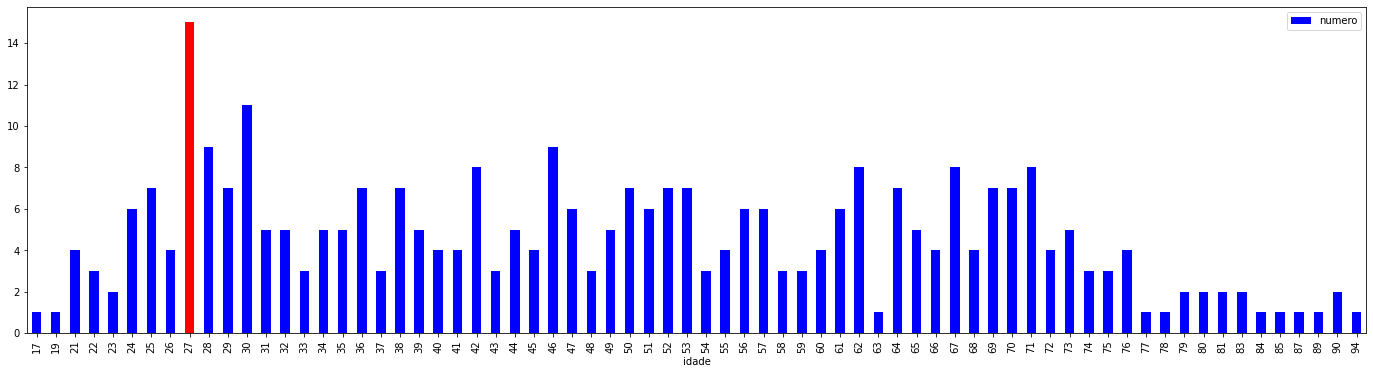

In [4]:
#Analisando graficamente. para isso, criei outro DF, o qtd_idade. Depois ordenei por idade. 

qtd_idade = df['Idade'].value_counts().to_frame().reset_index()
qtd_idade.rename(columns={'index': 'idade', 'Idade': 'numero'}, inplace = True)

#Aqui foi o pulo do gato. Consegui deixar só a barra dos 27 com cor diferente.
idades = qtd_idade.sort_values(by='idade')
cores = [ 'Red' if num == 27 else 'Blue' for num in idades['idade']]
idades.plot(x='idade', y='numero', kind='bar', figsize = (24,6), color = cores)
#plt.savefig('27.png')

In [28]:
#ver as médias e medianas de idades; idades máximas e mínimas

#df['Idade'].describe()
#Retornos: Idade mínima (17) e idade máxima (94)

#df['Idade'].mean() # => média de idade (49,16)

#df['Idade'].median() # => mediana (49,00)

#df['Idade'].mode() # => moda, valor que mais aparece (27)


### Analisando as causas

In [5]:
df['Causa'].value_counts()

Ataque cardíaco                                                     24
Câncer                                                              18
Causa não divulgada                                                 17
Acidente aéreo                                                      16
Overdose de heroína                                                 11
                                                                    ..
Meningite e pneumonia, seguidos de derrame e estado de \n\ncoma      1
Pancreatite                                                          1
Hemorragia interna e falência hepática                               1
Câncer no fígado                                                     1
Causa ainda não confirmada                                           1
Name: Causa, Length: 171, dtype: int64

In [6]:
causa = df['Causa']
display(causa)

0      Em um jogo de roleta russa com um revólver (ou...
1                                        Acidente aéreo 
2                              Acidente aéreo e incêndio
3                                        Acidente aéreo 
4                               Acidente automobilístico
                             ...                        
318                                  Causa não divulgada
319                           Causa ainda não confirmada
320                                  Causa não divulgada
321                                               COVID-
322                                      Ataque cardíaco
Name: Causa, Length: 323, dtype: object

Causas:
- Overdose: 39
- Acidente; 36
- Câncer: 43
- Eletrocutado: 02
- Suicídio: 23

In [11]:
#Testando métodos para filtrar as causas
# método contains => df['Overdose'] = df.Causa.str.contains('overdose' or '0verdose')
causas_detail = df[df['Causa'].str.contains('Eletrocutado')]
#causas_detail['Causa'].value_counts().sum()
causas_detail.head(10)

,Data,Nome,Idade,Origem,Atuação,Causa,Ano
19,3 de maio de 1972,Leslie Harvey,27,Escócia,Guitarrista do Stone the Crows,Eletrocutado durante um ensaio ao encostar em ...,1972
27,26 de novembro de 1973,John Rostill,31,Inglaterra,Baixista do The Shadows,Eletrocutado enquanto tocava guitarra em seu e...,1973


### Recorte só com 27

In [7]:
vinte_sete = df[df['Idade'] == 27]
#vinte_sete['Causa'].value_counts()
display(vinte_sete)

,Data,Nome,Idade,Origem,Atuação,Causa,Ano
12,3 de julho de 1969,Brian Jones,27,Inglaterra,Guitarrista dos Rolling Stones,Afogamento,1969
13,3 de setembro de 1970,Alan Wilson,27,Estados Unidos,Vocalista e compositor do Canned Heat,Overdose (ou suicídio),1970
14,18 de setembro de 1970,Jimi Hendrix,27,Estados Unidos,"Guitarrista, cantor e compositor",Sufocado com o próprio vômito (overdose),1970
15,4 de outubro de 1970,Janis Joplin,27,Estados Unidos,Cantora solo,Overdose de heroína,1970
16,3 de julho de 1971,Jim Morrison,27,Estados Unidos,Cantor e compositor do The Doors,Ataque cardíaco (causa oficial) ou overdose de...,1971
19,3 de maio de 1972,Leslie Harvey,27,Escócia,Guitarrista do Stone the Crows,Eletrocutado durante um ensaio ao encostar em ...,1972
23,8 de março de 1973,Ron McKernan,27,Estados Unidos,Tecladista do Grateful Dead,Hemorragia gastrointestinal,1973
34,24 de abril de 1975,Pete Ham,27,País de Gales,Vocalista e guitarrista do Badfinger,Suicídio por enforcamento,1975
35,10 de fevereiro de 1975,Dave Alexander,27,Estados Unidos,Baixista do The Stooges,Edema pulmonar,1975
36,8 de dezembro de 1975,Gary Thain,27,Nova Zelândia,Ex-baixista do Uriah Heep,Overdose de heroína,1975


In [8]:
vinte_sete_causas = vinte_sete[vinte_sete['Causa'].str.contains('Overdose|overdose')]
vinte_sete_causas['Causa'].value_counts()

Overdose de heroína                                                                                               3
Overdose (ou suicídio)                                                                                            1
Sufocado com o próprio vômito (overdose)                                                                          1
Ataque cardíaco (causa oficial) ou overdose de heroína (teoria mais \naceita, pois não foi realizada autópsia)    1
Name: Causa, dtype: int64

### Análises das causas só com os do 27
- Dos 15 casos, foram 06 overdoses

### Recorte Brasil

In [9]:
brasil = df[df['Origem'] == 'Brasil']


### Idade 

In [10]:
#No caso Brasileiro, a idade que mais aparece é 30 anos, com 6% dos casos


brasil['Idade'].value_counts(normalize = True)*100
#brasil['Idade'].value_counts()

#ver as médias e medianas de idades; idades máximas e mínimas

#brasil['Idade'].describe()
#Retornos: Idade mínima (17) e idade máxima (94)

#brasil['Idade'].mean() # => média de idade (45,75)

#brasil['Idade'].median() # => mediana (42)

#brasil['Idade'].mode() # => moda, valor que mais aparece


30    6.060606
35    6.060606
39    6.060606
61    6.060606
62    6.060606
53    6.060606
68    3.030303
73    3.030303
76    3.030303
45    3.030303
72    3.030303
47    3.030303
85    3.030303
50    3.030303
29    3.030303
42    3.030303
44    3.030303
33    3.030303
36    3.030303
25    3.030303
22    3.030303
26    3.030303
28    3.030303
24    3.030303
27    3.030303
32    3.030303
66    3.030303
Name: Idade, dtype: float64

### Graficamente

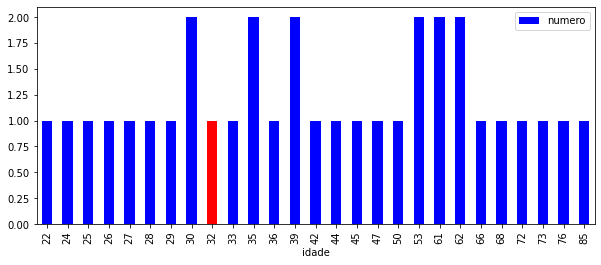

In [11]:
br_idade = brasil['Idade'].value_counts().to_frame().reset_index()
br_idade.rename(columns={'index': 'idade', 'Idade': 'numero'}, inplace = True)

#Aqui foi o pulo do gato. Consegui deixar só a barra dos 27 com cor diferente.
idades_br = br_idade.sort_values(by='idade')
cores = [ 'Red' if num == 27 else 'Blue' for num in idades['idade']]
idades_br.plot(x='idade', y='numero', kind='bar', figsize = (10,4), color = cores)
plt.savefig('brasil.png')

### Causas Brasil

In [12]:
brasil['Causa'].value_counts()

Acidente aéreo                                                               5
 AIDS                                                                        3
Ataque cardíaco                                                              3
Acidente automobilístico                                                     2
COVID-                                                                       2
Acidente (ou suicídio) ao cair da janela de seu apartamento, no º andar\n    1
Complicações decorrentes de AVC                                              1
Insuficiência respiratória                                                   1
Infecção pulmonar                                                            1
Trombose venosa cerebral decorrente de COVID-                                1
Enfarte agudo do miocárdio                                                   1
Fibrose pulmonar                                                             1
pneumonia (problemas cardíacos)                     